In [ ]:
#Importing Libaries

from tensorflow import keras
from keras.models import load_model
from keras.preprocessing import image
from google.colab import drive
import numpy as np
import cv2

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#loading the model

model = load_model("/content/drive/MyDrive/IBM/aslpng1.h5")

In [6]:
from skimage.transform import resize
def detect(frame):
    img = resize(frame, (64, 64, 3))
    img = np.expand_dims(img, axis = 0)
    if np.max(img) > 1:
        img = img/255.0
    prediction = model.predict(img)
    print(prediction)
    return prediction

In [7]:
frame = cv2.imread(r"/content/drive/MyDrive/IBM/Datasets/Dataset/training_set/D/1011.png")
data = detect(frame)

1/1 [==============================] - 0s 428ms/step
[[9.1269165e-08 6.7969074e-07 6.8366861e-11 9.9996257e-01 7.4525508e-07
  5.6558258e-07 3.0344079e-08 1.4256367e-08 3.5410001e-05]]


In [8]:
index = ['A','B','C','D','E','F','G','H','I']
index[np.argmax(data)]

'D'

Open CV

In [9]:
#Importing Library

import cv2

In [11]:
img=cv2.imread(r'/content/drive/MyDrive/IBM/Datasets/Dataset/training_set/C/10.png',1)


In [12]:
img1=cv2.imread(r'/content/drive/MyDrive/IBM/Datasets/Dataset/training_set/D/10.png',0)

In [13]:
print(img.shape)

(64, 64, 3)


In [14]:
#Importing library

from google.colab.patches import cv2_imshow

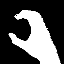

In [15]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

CNN Video Analysis

In [17]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/IBM/aslpng1.h5')
video=cv2.VideoCapture(0)
index=['A','B','C','D','E','F','G','H','I']
if video.isOpened():
    current_frame = 0
    while 1:
      succes,frame=video.read()
      cv2.imwrite('image.jpg',frame)
      img=image.load_img('image.jpg',target_size=(64,64))
      x=image.img_to_array(img)
      x=np.expand_dims(x,axis=0)
      pred=np.argmax(model.predict(x),axis=1)
      y=pred[0]
      copy = frame.copy()
      cv2.rectangle(copy, (320, 100), (620,400), (255,0,0), 5)
      cv2.putText(frame,'The Predicted Alphabet is: '+str(index[y]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4)
      cv2.imshow('image',frame)
      if cv2.waitKey(1) & 0xFF == ord('q'):
          break
video.release()
cv2.destroyAllWindows()